# Basic Forecasting Techniques

In [1]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')
print("Data before transformation")
data = pd.read_csv('Customers_in_a_Shop.csv',header=None)
data.head()

Data before transformation


0      1
0  1949-01  114.0
1  1949-02  120.0
2  1949-03  134.0
3  1949-04   67.0
4  1949-05  123.0

### Reading the dataset

In [2]:
data = pd.read_csv('Customers_in_a_Shop.csv',header=None)
data.columns = ['Date','Customers']
data['Date'] = pd.to_datetime(data['Date'],format="%Y-%m")
data = data.set_index('Date') # convert data into row index

#Shape of the dataset
data.shape

(144, 1)

In [3]:
data.head()

Customers
Date                 
1949-01-01      114.0
1949-02-01      120.0
1949-03-01      134.0
1949-04-01       67.0
1949-05-01      123.0

In [4]:
data.describe()

Customers
count  140.000000
mean   291.878571
std    150.040592
min     34.000000
25%    180.000000
50%    265.500000
75%    364.750000
max    770.000000

## Missing Values

In [5]:
rows_with_nan = [index for index, row in data.iterrows() if row.isnull().any()]
print(rows_with_nan)

[Timestamp('1951-06-01 00:00:00'), Timestamp('1951-07-01 00:00:00'), Timestamp('1954-06-01 00:00:00'), Timestamp('1960-03-01 00:00:00')]


In [6]:
data.isnull().sum()

Customers    4
dtype: int64

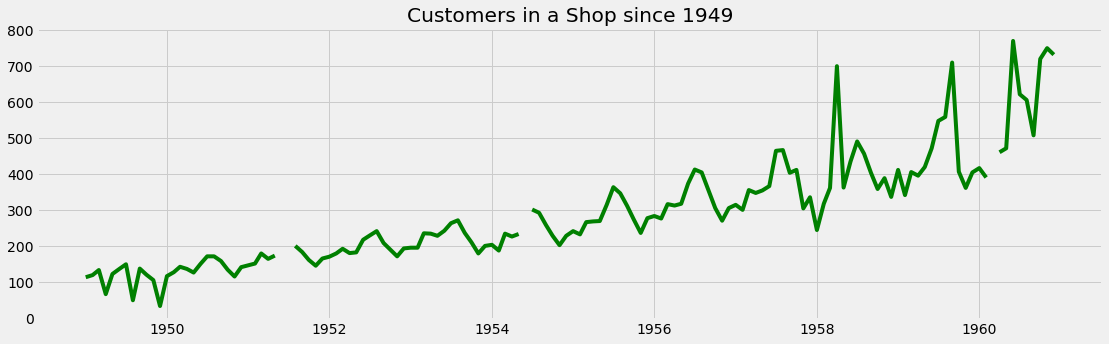

In [7]:
plt.rcParams['figure.figsize']=(17,5)
plt.plot(data,color='green')
plt.title("Customers in a Shop since 1949")
plt.show()

In [8]:
data.isnull().sum()

Customers    4
dtype: int64

# Option 1:Using fillna method using backfill or forwardfill (Run in seperate notebook)

In [9]:
data.Customers=data.Customers.fillna(method="ffill")
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html
# ffill: propagate last valid observation forward to next valid backfill / bfill: use next valid observation to fill gap.

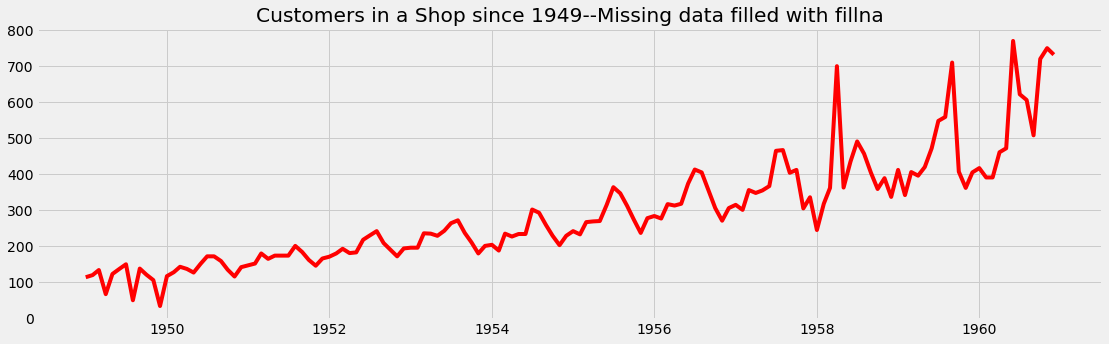

In [10]:
plt.rcParams['figure.figsize']=(17,5)
plt.plot(data,color='red')
plt.title("Customers in a Shop since 1949--Missing data filled with fillna")
plt.show()

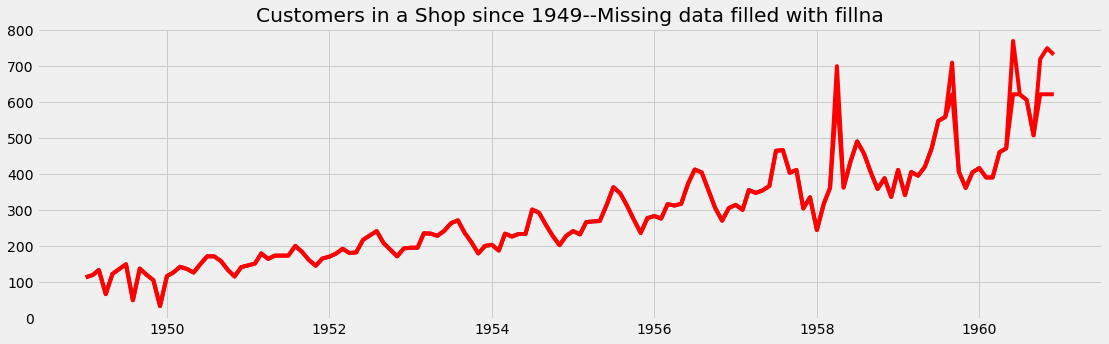

In [18]:
data.Customers=data.Customers.fillna(method="bfill")
plt.rcParams['figure.figsize']=(17,5)
plt.plot(data,color='red')
plt.title("Customers in a Shop since 1949--Missing data filled with fillna")
plt.show()

## Option 2: Linear Interpolation

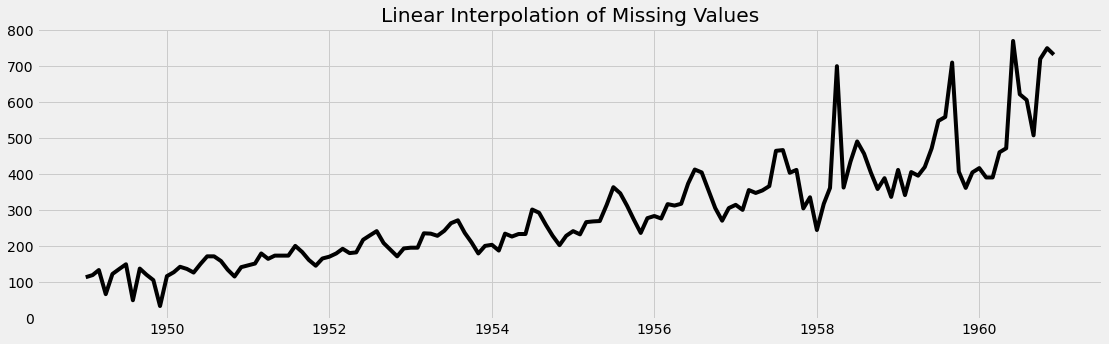

In [11]:
plt.rcParams['figure.figsize']=(17,5)
data['Customers_linear']=data['Customers'].interpolate(method='linear')
plt.plot(data['Customers_linear'],color='black')
plt.title("Linear Interpolation of Missing Values")
plt.show()

#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html

In [12]:
data['Customers'] = data['Customers_linear']

# Option 3 - Padding (Run in seperate notebook)

In [13]:
data.interpolate(method="pad", limit=4) # Limit value is equal to number of missing values, we had 4 values missing 
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html
# See rough cells at end for a simple example

Customers  Customers_linear
Date                                   
1949-01-01      114.0             114.0
1949-02-01      120.0             120.0
1949-03-01      134.0             134.0
1949-04-01       67.0              67.0
1949-05-01      123.0             123.0
...               ...               ...
1960-08-01      606.0             606.0
1960-09-01      508.0             508.0
1960-10-01      720.0             720.0
1960-11-01      750.0             750.0
1960-12-01      732.0             732.0

[144 rows x 2 columns]

## Outliers Treatment

## Box plot
It is a standardized way of displaying the distribution of data. Any data points which are less than Q1-1.5IQR or greater than Q3+1.5IQR are considered to be outliers.

<AxesSubplot:xlabel='Customers_linear'>

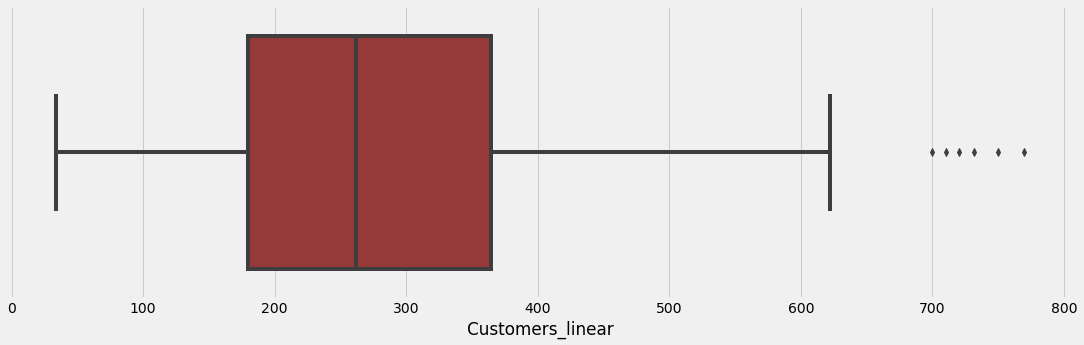

In [14]:
plt.rcParams['figure.figsize']=(17,5)
sns.boxplot(data['Customers_linear'], color='brown')

In [15]:
data['Customers_linear'].sort_values(ascending = False).head(7)

Date
1960-06-01    770.0
1960-11-01    750.0
1960-12-01    732.0
1960-10-01    720.0
1959-09-01    710.0
1958-04-01    700.0
1960-07-01    622.0
Name: Customers_linear, dtype: float64

In [16]:
# outliers treatment

data['Customers_linear'].loc[(data['Customers_linear']>=700)] = 622
# lets also check the null values again
data.isnull().sum()

Customers           0
Customers_linear    0
dtype: int64